In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [22]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# Data display customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [24]:
from google.colab import files
file = files.upload()

Saving book.csv to book (1).csv


In [25]:
# Importing dataset
data = pd.read_csv('book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# **Descriptive Statistics**

In [26]:
# most popular items
count = data.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [27]:
data.shape

(2000, 11)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [29]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

ChildBks
0    1154
1    846 
Name: ChildBks, dtype: int64

YouthBks
0    1505
1    495 
Name: YouthBks, dtype: int64

CookBks
0    1138
1    862 
Name: CookBks, dtype: int64

DoItYBks
0    1436
1    564 
Name: DoItYBks, dtype: int64

RefBks
0    1571
1    429 
Name: RefBks, dtype: int64

ArtBks
0    1518
1    482 
Name: ArtBks, dtype: int64

GeogBks
0    1448
1    552 
Name: GeogBks, dtype: int64

ItalCook
0    1773
1    227 
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1    74  
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1    97  
Name: ItalArt, dtype: int64

Florence
0    1783
1    217 
Name: Florence, dtype: int64



In [30]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))

The unique books sold are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
The number of unique books sold are 11 


# **Data Visualization**

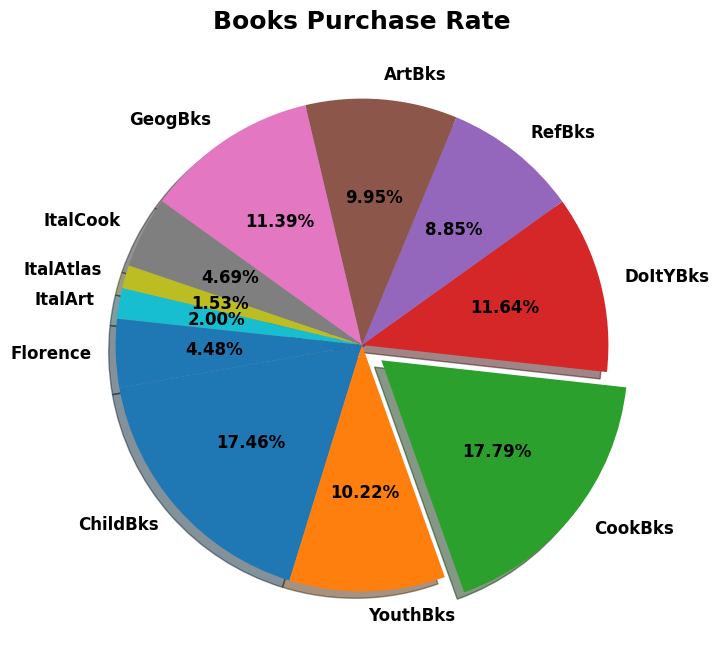

In [32]:
plt.figure(figsize = (12,8))
plt.pie(data.sum(),
       labels=data.columns,
       explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})

#plt.legend(loc= 'best')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [33]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


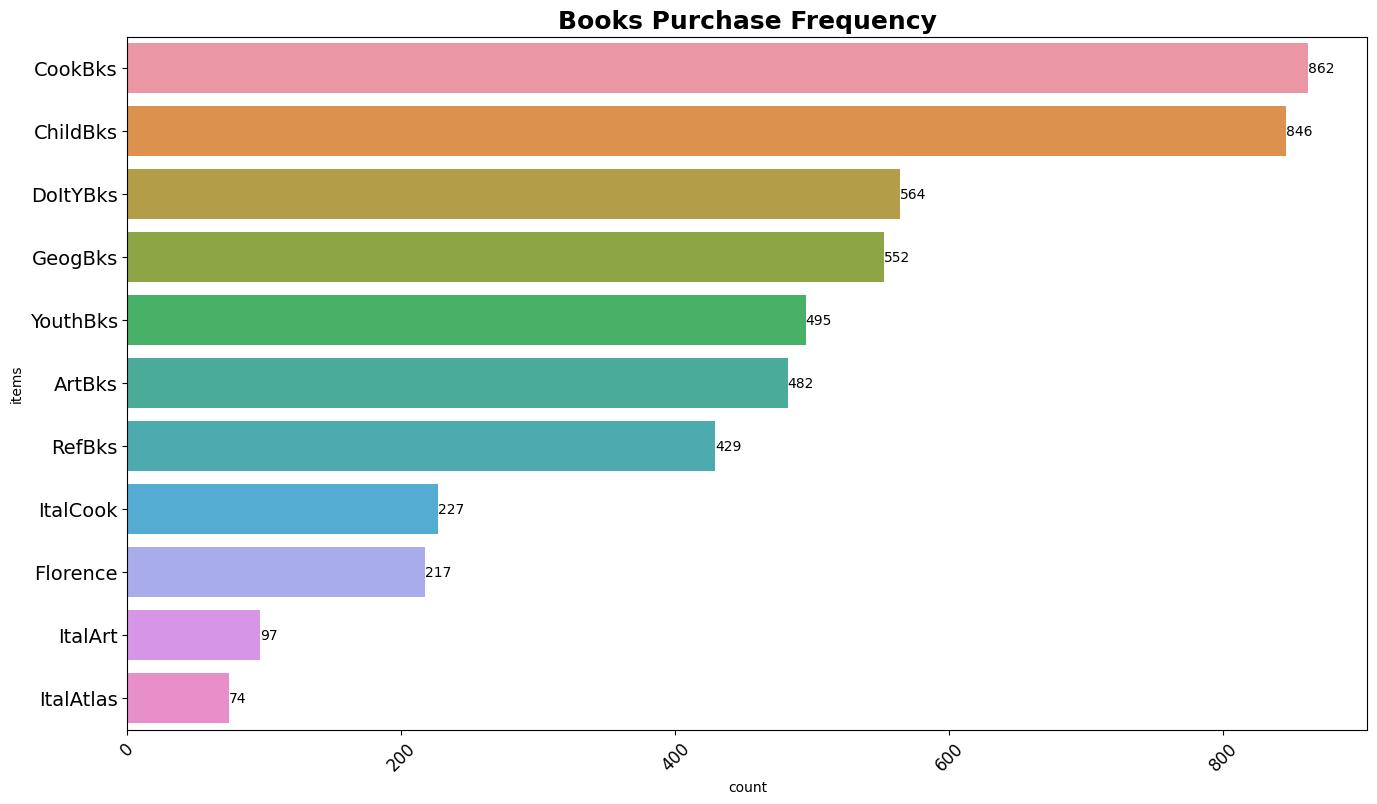

In [34]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

**Conclusion:**
Most Frequent Bought Books are : Cooking books and Child books

# **Support and Length**

<B>Frist Iteration: </B> If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [35]:
# Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [36]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085


In [37]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [38]:
# Elimination by Support Value
first[first.Support >= 0.20]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


 <B>Second Iteration: </B> Find support values for pair product combinations.

In [39]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]

# Sample of combinations
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

In [40]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks)",0.2560,2
"(ChildBks, GeogBks)",0.1950,2
"(CookBks, GeogBks)",0.1925,2
"(CookBks, DoItYBks)",0.1875,2
"(ChildBks, DoItYBks)",0.1840,2
"(CookBks, ArtBks)",0.1670,2
"(ChildBks, YouthBks)",0.1650,2
"(ChildBks, ArtBks)",0.1625,2
"(CookBks, YouthBks)",0.1620,2


In [41]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]

# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks'],
 ['CookBks', 'ChildBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'Florence'],
 ['CookBks', 'ChildBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks']]

In [42]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks, GeogBks)",0.1495,3
"(CookBks, ChildBks, DoItYBks)",0.1460,3
"(CookBks, ChildBks, YouthBks)",0.1290,3
"(CookBks, ChildBks, ArtBks)",0.1265,3
"(CookBks, ChildBks, RefBks)",0.1225,3
"(CookBks, DoItYBks, GeogBks)",0.1085,3
"(ChildBks, DoItYBks, GeogBks)",0.1045,3
"(CookBks, GeogBks, ArtBks)",0.1035,3
"(ChildBks, GeogBks, ArtBks)",0.1020,3


In [43]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]

# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'Florence'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalAtlas'],
 ['CookBks', 'ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'GeogBks', 'ArtBks']]

In [45]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


# **Association Rules**

<a id='1'></a>
<h1 style="color:forestgreen" >1. Association rules with 5% Support and 50% confidence </h1>

In [105]:
# With 5% Support
frequent_itemsets=apriori(data,min_support=0.05,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(DoItYBks, YouthBks, CookBks, GeogBks)",4
96,0.0560,"(ArtBks, YouthBks, CookBks, GeogBks)",4
97,0.0650,"(ArtBks, DoItYBks, CookBks, GeogBks)",4
98,0.0510,"(DoItYBks, CookBks, ChildBks, YouthBks, GeogBks)",5


In [106]:
# with 50% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
...,...,...,...,...,...,...,...,...,...,...
255,"(ChildBks, ArtBks, DoItYBks)","(CookBks, GeogBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494,0.727268
256,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231,0.701933
257,"(ArtBks, CookBks, GeogBks)","(ChildBks, DoItYBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120,0.718391
258,"(ChildBks, ArtBks, GeogBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763,0.715505


In [107]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
208,"(ChildBks, ItalCook)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
209,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522,0.734961
259,"(ChildBks, DoItYBks, GeogBks)","(ArtBks, CookBks)",0.1045,0.1670,0.0535,0.511962,3.065639,0.036048,1.706833,0.752433
151,"(DoItYBks, RefBks)","(ChildBks, YouthBks)",0.1055,0.1650,0.0530,0.502370,3.044665,0.035592,1.677952,0.750762
...,...,...,...,...,...,...,...,...,...,...
10,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
8,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [108]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
...,...,...,...,...,...,...,...,...,...,...
255,"(ChildBks, ArtBks, DoItYBks)","(CookBks, GeogBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494,0.727268
256,"(ArtBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231,0.701933
257,"(ArtBks, CookBks, GeogBks)","(ChildBks, DoItYBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120,0.718391
258,"(ChildBks, ArtBks, GeogBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763,0.715505


<a id='vr1'></a>
<h1 style="color:forestgreen" >1.1 Visualization of obtained rule </h1>

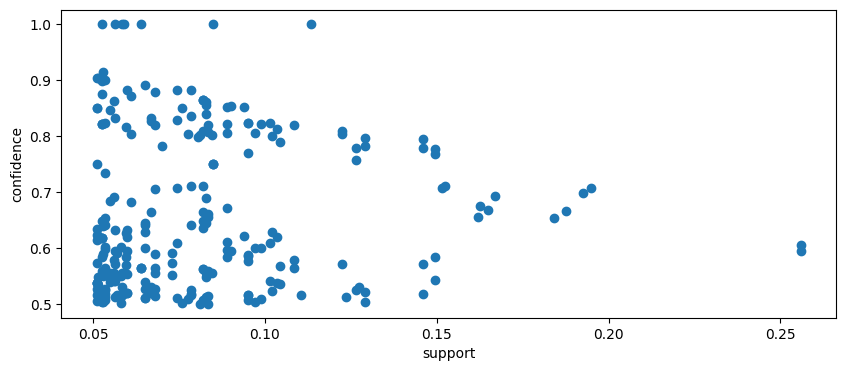

In [109]:
# visualization of obtained rule
plt.figure(figsize=(10,4))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [110]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(CookBks),(YouthBks),(DoItYBks),(GeogBks),"(ChildBks, CookBks)",(RefBks),(ArtBks),"(YouthBks, CookBks)","(DoItYBks, CookBks)","(CookBks, GeogBks)","(ChildBks, DoItYBks)","(ChildBks, GeogBks)","(ChildBks, YouthBks)","(ArtBks, CookBks)"
antecedents,,,,,,,,,,,,,,,
(YouthBks),1.576044,1.518667,NaN,NaN,NaN,2.035985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, DoItYBks, CookBks)",1.909886,NaN,2.089864,NaN,2.320268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.703044,NaN,NaN
"(DoItYBks, RefBks, CookBks)",2.084295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, YouthBks, GeogBks)",2.000364,1.998929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, ArtBks, GeogBks)",NaN,1.899368,2.178649,2.068558,NaN,NaN,NaN,NaN,NaN,2.797386,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(DoItYBks, GeogBks)",1.864490,1.899926,2.073566,NaN,NaN,2.623821,NaN,2.286072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, DoItYBks)",1.818512,1.906873,NaN,NaN,2.141642,2.593623,NaN,NaN,NaN,NaN,2.734108,NaN,NaN,NaN,NaN
"(DoItYBks, RefBks)",2.016739,1.858348,2.221265,NaN,2.009067,2.758442,NaN,2.104187,NaN,NaN,NaN,NaN,NaN,3.044665,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'CookBks'})"),
  Text(2.5, 0, "frozenset({'YouthBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks'})"),
  Text(5.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(6.5, 0, "frozenset({'RefBks'})"),
  Text(7.5, 0, "frozenset({'ArtBks'})"),
  Text(8.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(9.5, 0, "frozenset({'DoItYBks', 'CookBks'})"),
  Text(10.5, 0, "frozenset({'CookBks', 'GeogBks'})"),
  Text(11.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(12.5, 0, "frozenset({'ChildBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'ChildBks', 'YouthBks'})"),
  Text(14.5, 0, "frozenset({'ArtBks', 'CookBks'})")])

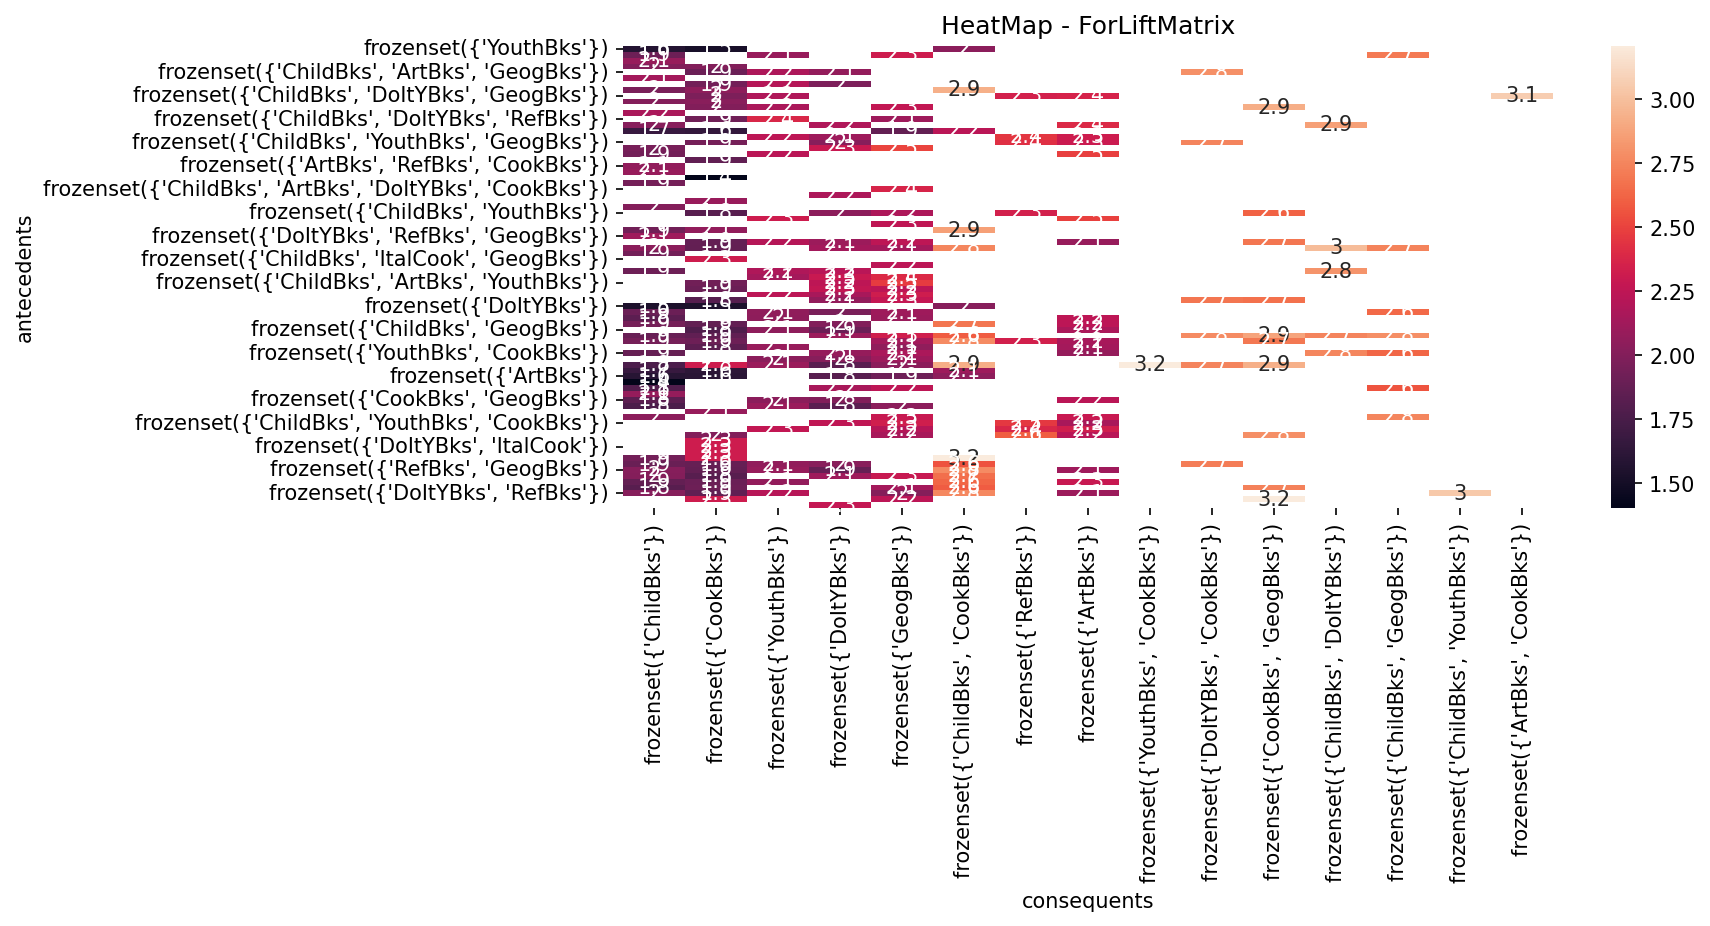

In [111]:
plt.figure(figsize=(10,4),dpi=150)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

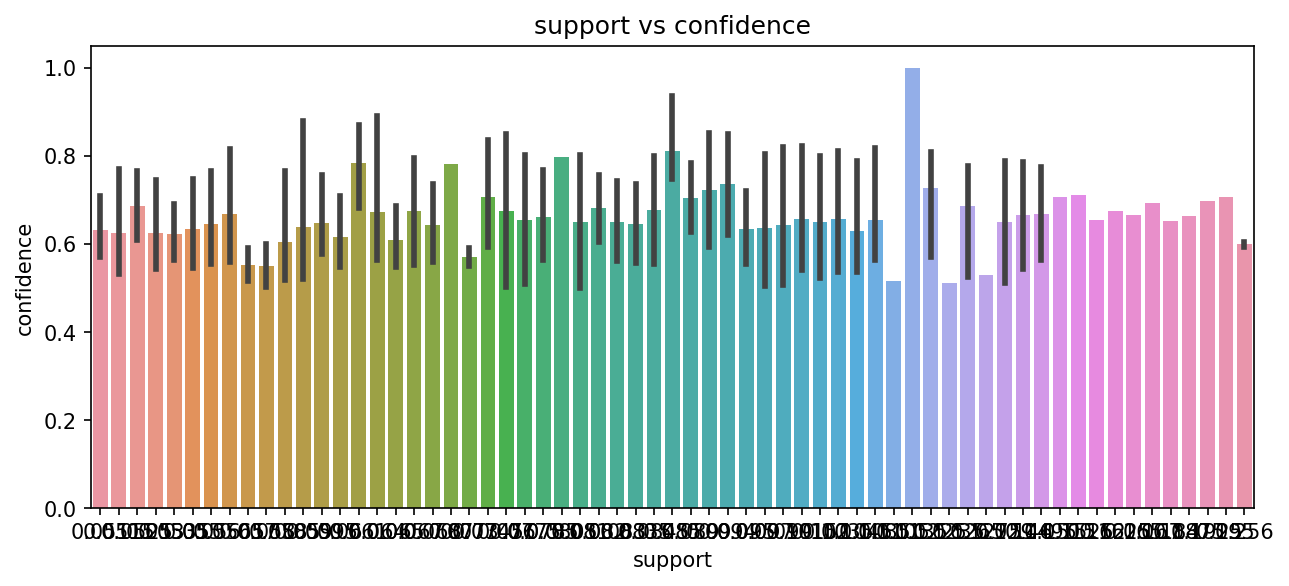

In [112]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x= "support",y= "confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

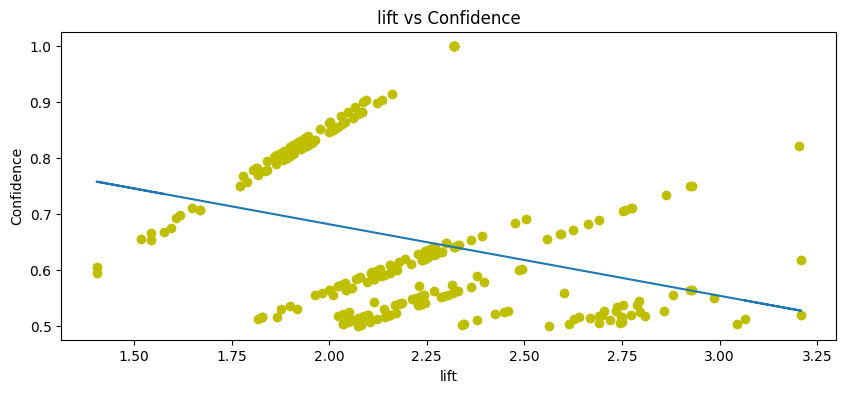

In [113]:
plt.figure(figsize=(10,4))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

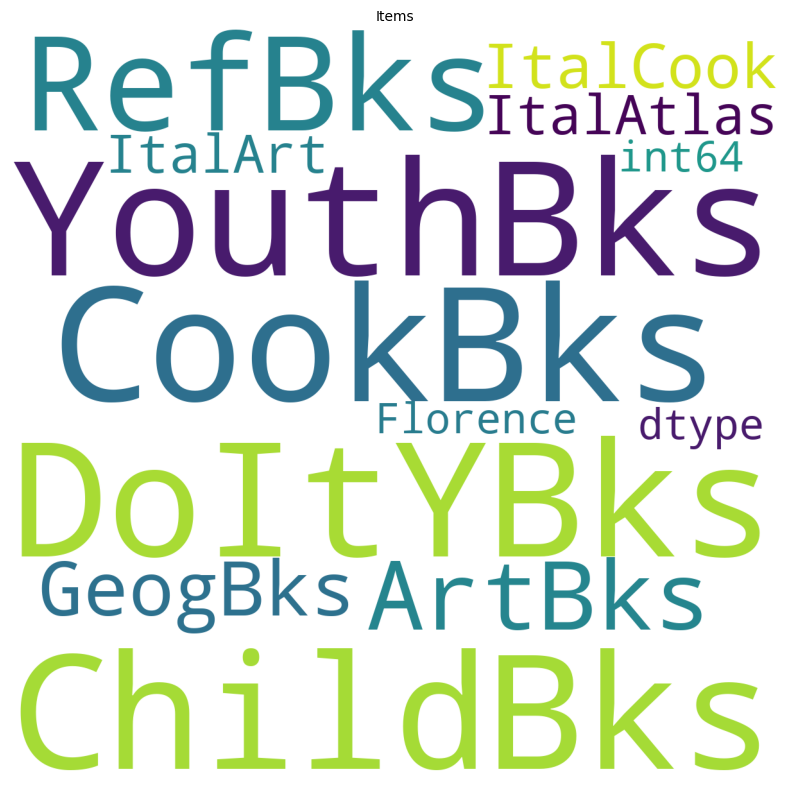

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 10)
plt.show()

<a id='2'></a>
<h1 style="color:forestgreen" >2. Association rules with 10% Support and 45% confidence</h1>

In [115]:
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.10,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [116]:
# with 45% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.45)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
6,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
7,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
9,(YouthBks),(DoItYBks),0.2475,0.2820,0.1155,0.466667,1.654846,0.045705,1.346250,0.525866


In [117]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
46,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
51,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
55,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
57,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
32,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,0.741584
34,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652,0.702405
47,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452,0.669894
50,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626,0.643481
42,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273,0.728432


In [118]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
6,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
7,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
9,(YouthBks),(DoItYBks),0.2475,0.2820,0.1155,0.466667,1.654846,0.045705,1.346250,0.525866


<a id='vr2'></a>
<h1 style="color:forestgreen" >2.1 Visualization of obtained rule</h1>

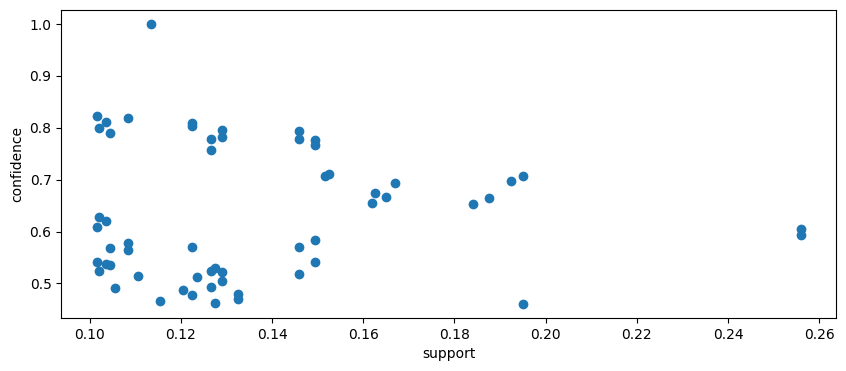

In [119]:
# visualization of obtained rule
plt.figure(figsize=(10,4))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [120]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(CookBks),(GeogBks),(DoItYBks),(ArtBks),(YouthBks),"(ChildBks, CookBks)",(RefBks)
antecedents,,,,,,,,
(YouthBks),1.576044,1.518667,1.764017,1.654846,NaN,NaN,2.035985,NaN
"(DoItYBks, GeogBks)",1.864490,1.899926,NaN,NaN,NaN,NaN,NaN,NaN
(CookBks),1.404179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,1.998711,2.230964,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,1.778809,NaN,1.900346,2.170444,NaN,NaN,NaN
"(ArtBks, CookBks)",1.790745,NaN,2.245509,2.155264,NaN,NaN,NaN,NaN
"(ChildBks, ArtBks)",NaN,1.806175,2.274247,NaN,NaN,NaN,NaN,NaN
"(RefBks, CookBks)",1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, RefBks)",NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'CookBks'})"),
  Text(2.5, 0, "frozenset({'GeogBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'ArtBks'})"),
  Text(5.5, 0, "frozenset({'YouthBks'})"),
  Text(6.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(7.5, 0, "frozenset({'RefBks'})")])

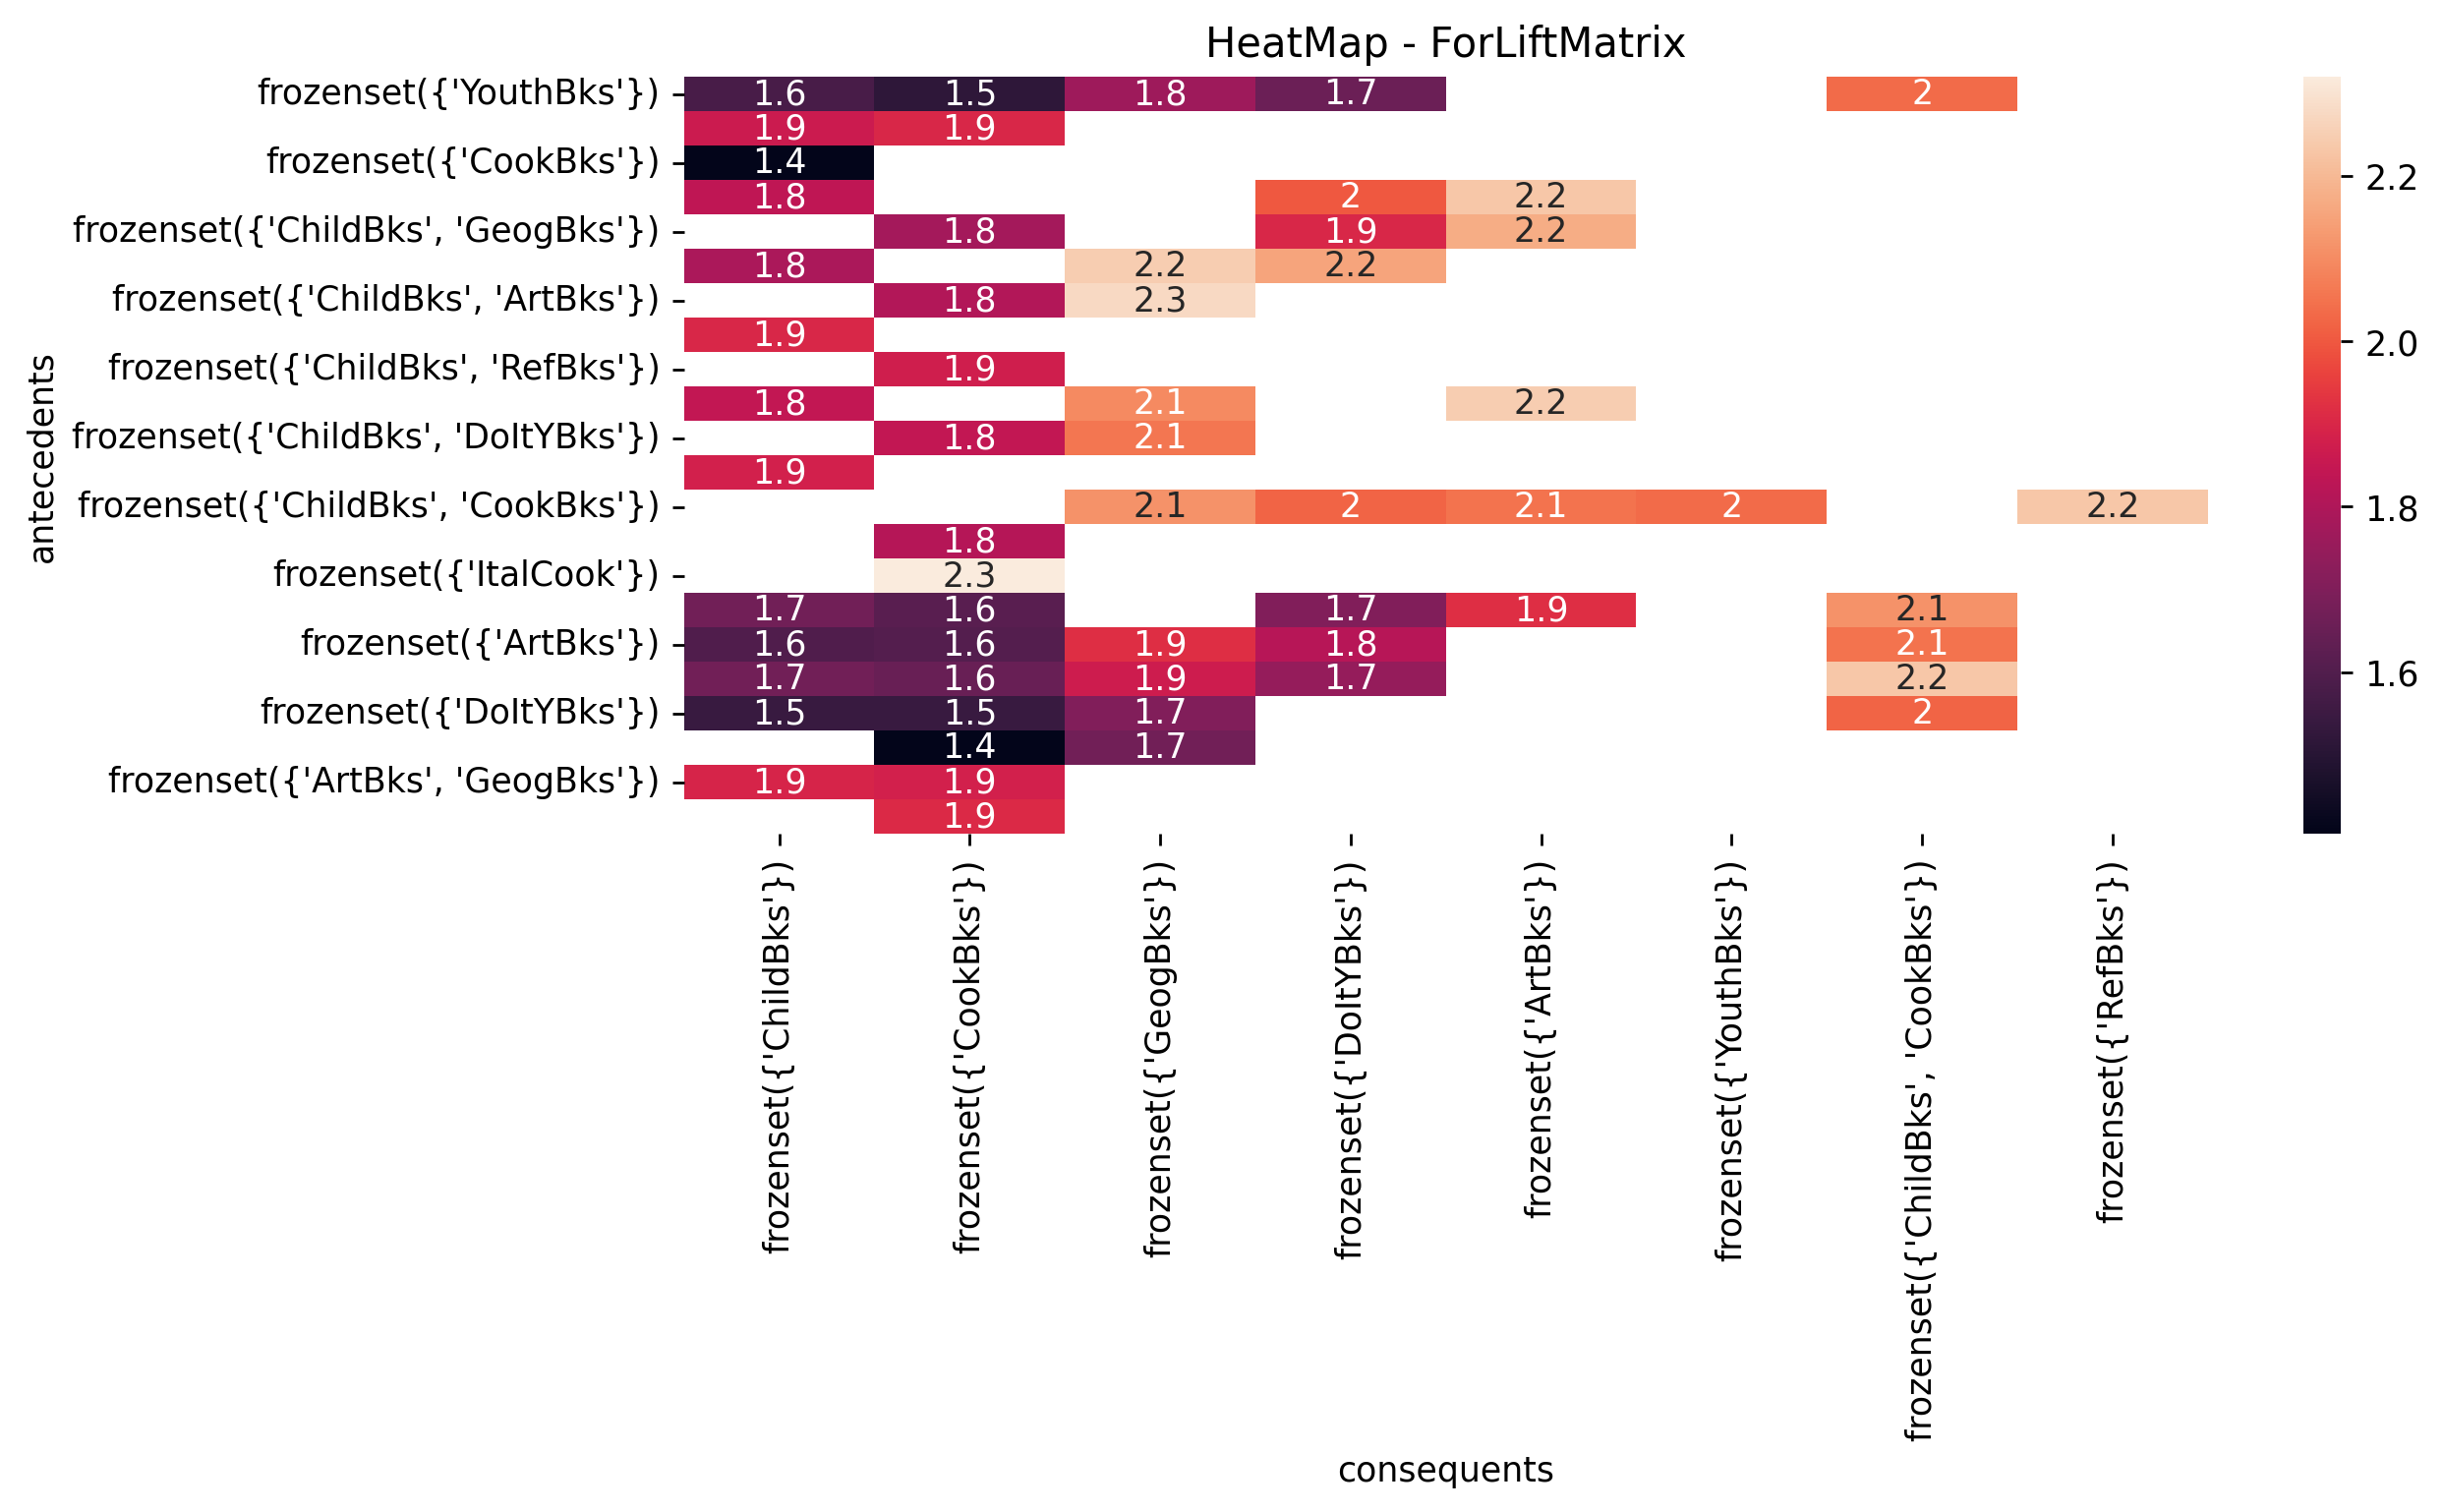

In [121]:
plt.figure(figsize=(10,4),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

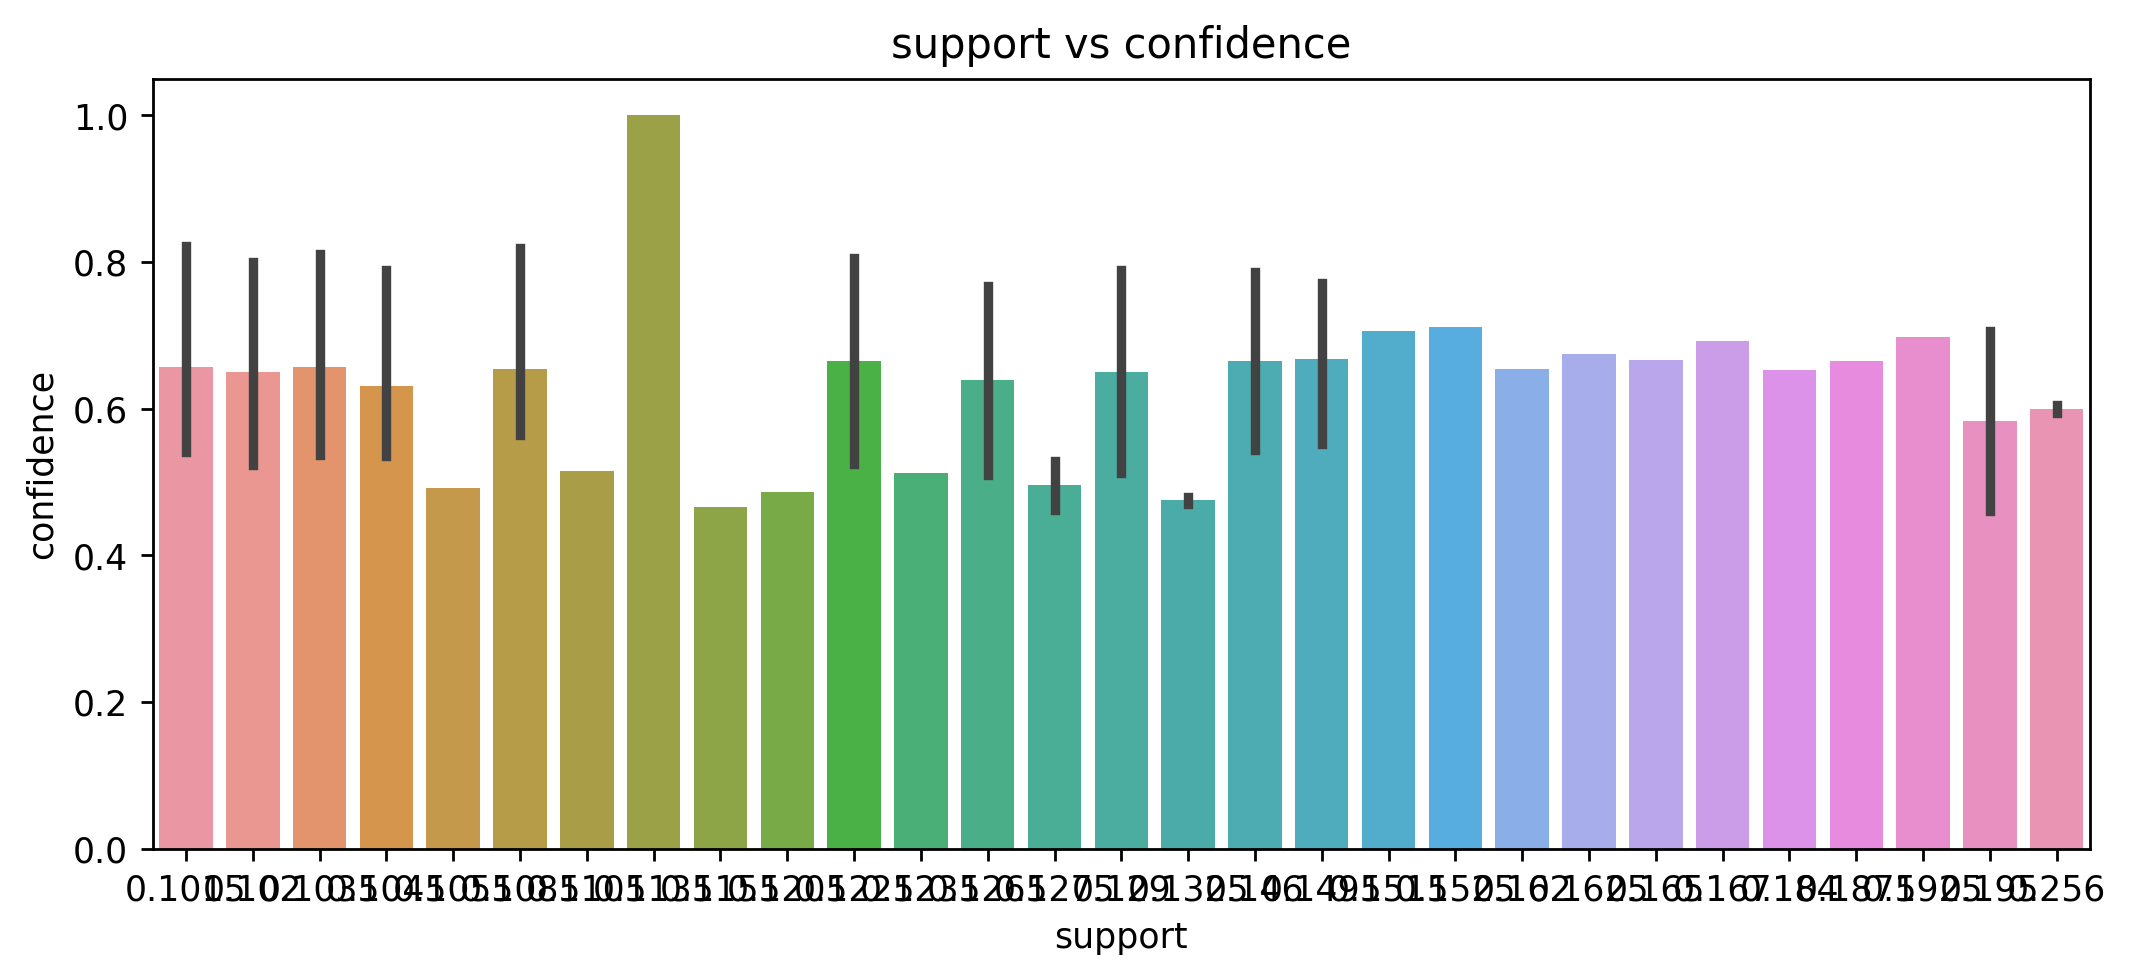

In [122]:
plt.figure(figsize=(10,4),dpi=250)
sns.barplot(x= "support",y= "confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

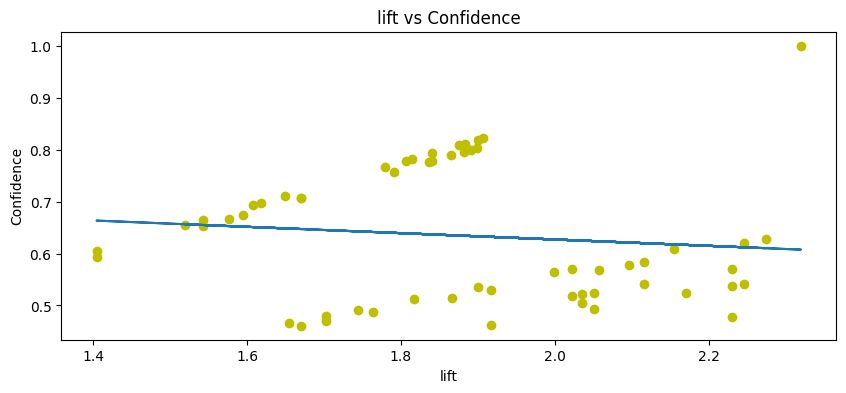

In [123]:
plt.figure(figsize=(10,4))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

<a id='3'></a>
<h1 style="color:forestgreen" >3. Association rules with 20% Support and 40% confidence</h1>

In [124]:
# With 20% Support
frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [127]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [128]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [129]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


<a id='vr3'></a>
<h1 style="color:forestgreen" >3.1 Visualization of obtained rule</h1>

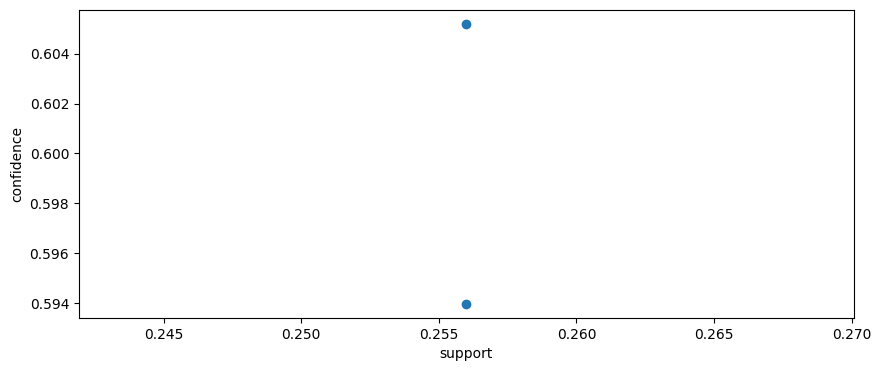

In [130]:
# visualization of obtained rule
plt.figure(figsize=(10,4))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [131]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(CookBks),(ChildBks)
antecedents,,
(ChildBks),1.404179,NaN
(CookBks),NaN,1.404179


(array([0.5, 1.5]),
 [Text(0.5, 0, "frozenset({'CookBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})")])

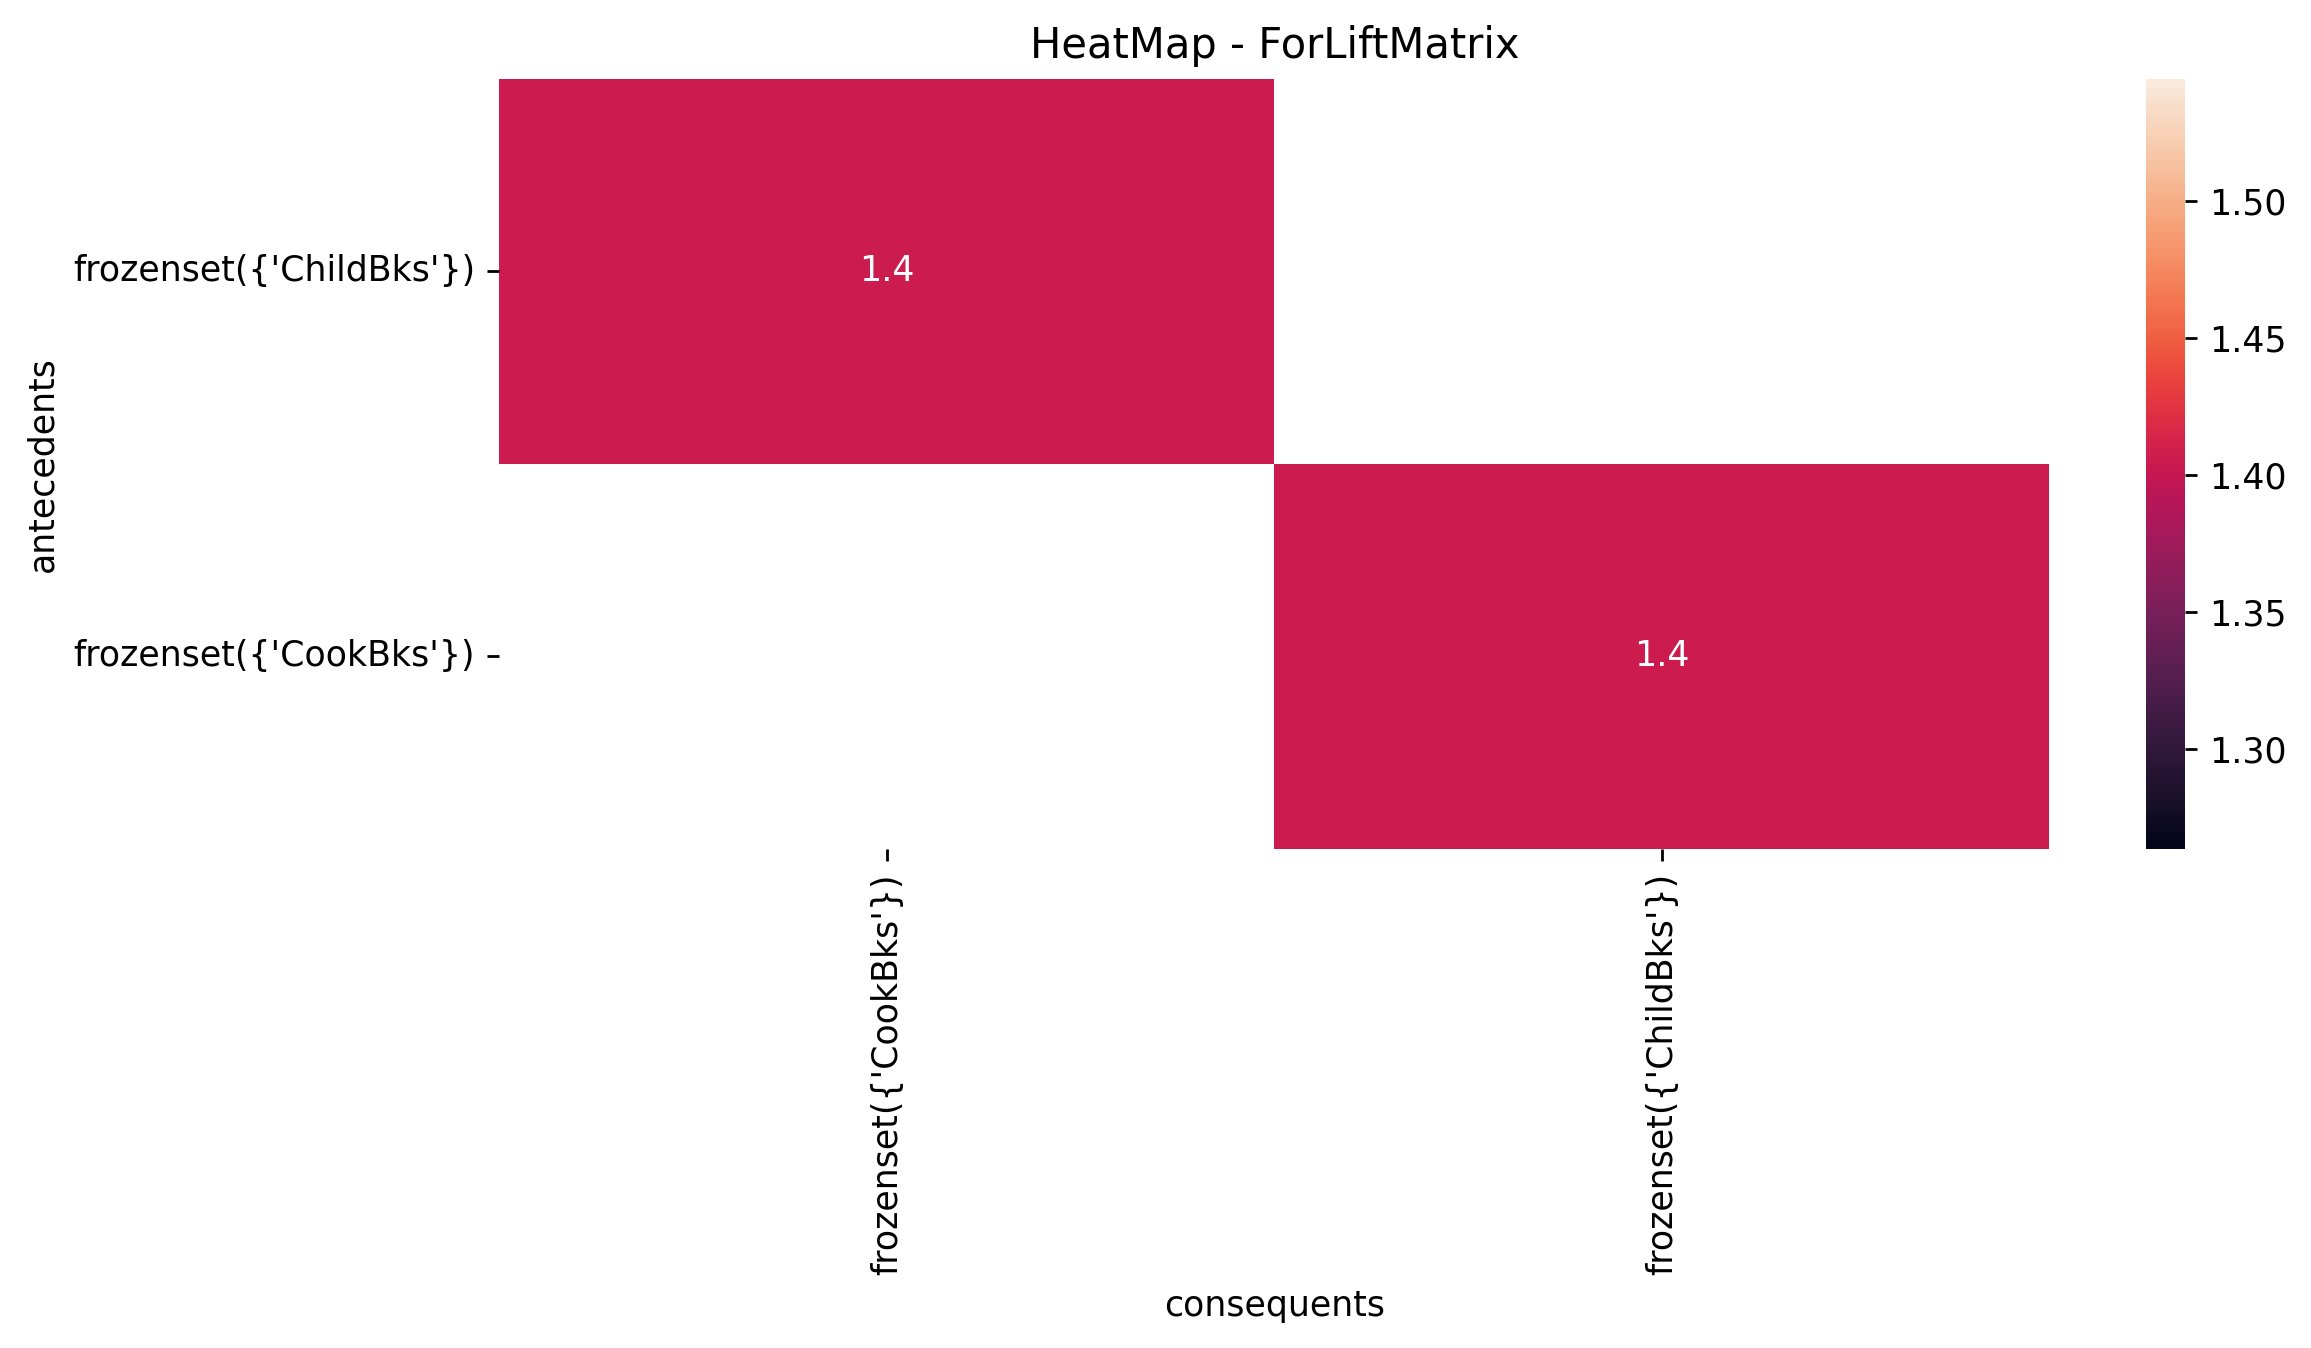

In [132]:
plt.figure(figsize=(10,4),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

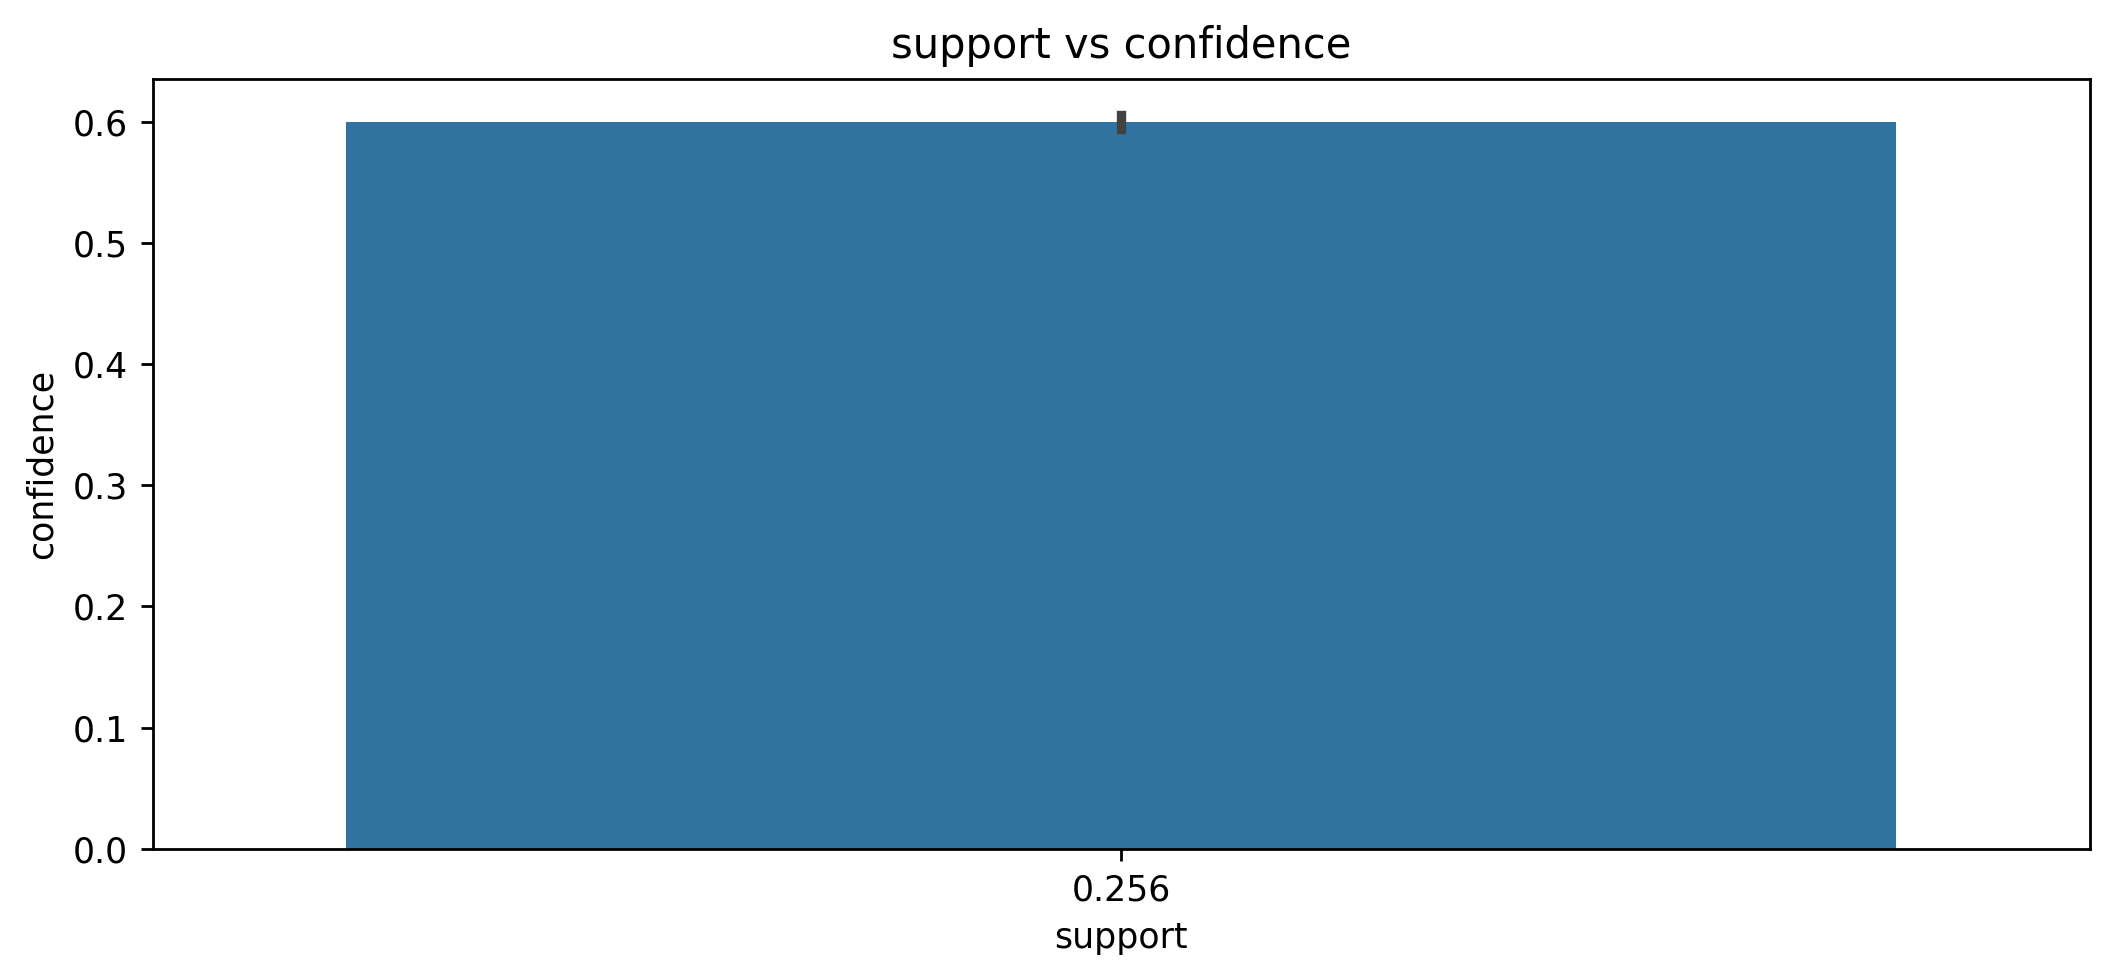

In [134]:
plt.figure(figsize=(10,4),dpi=250)
sns.barplot(x= "support",y= "confidence",data=lift)
plt.title("support vs confidence")
plt.show()